---
# 1. Mecab 설치
---

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip install JPype1
pip install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [1,075 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://s

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   522k      0  0:00:02  0:00:02 --:--:-- 1278k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [5]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


---
# 2. SentencePiece 설치하기
---

In [6]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.1 MB/s 


---
# 3. 필요 라이브러리 불러오기
---

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
import pandas as pd 

print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(konlpy.__version__)

2.8.2
1.21.6
3.2.2
0.6.0


---
# 4. 데이터 불러오기 및 전처리
---

In [8]:
import os
path_to_file = '/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


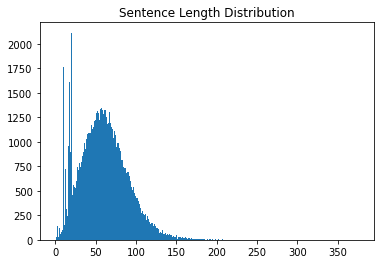

In [9]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

- 길이별 데이터 확인 함수

In [10]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)
print('='*50)
check_sentence_with_length(raw, 2)

’
1.
2.
3.
4.
면접
음식
햇빛
과일
양파
Q:
4.
6.
..


In [11]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [12]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

- 확인용 데이터프레임 생성

In [13]:
check = pd.DataFrame(raw,columns = ['sentence'])
check.head()

,sentence
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?"""
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분..."
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...


- isin = 정확히 같은 단어가 들어가 있는 리스트만 뽑기
- str.contains = 해당 단어가 들어가 있는 리스트 뽑기

In [14]:
check[check['sentence'].isin(['1.'])]

,sentence
6262,1.


In [15]:
check[check['sentence'].str.contains('1.')]

,sentence
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...
12,"아시아에서의 왕성한 수요 덕분에 일본의 수출이 9월에 연속 6개월간 증가하여, 무역..."
21,말레이시아의 수도 쿠알라 룸푸르에서 열리는 이틀간의 회담에서는 1970년대와 80년...
22,100여명의 사망자가 예상되는 베트남 빌딩 화재
37,미국에서 끔찍한 공격이 발생하기 전에 작성된 이 연구 보고서는 2004년까지 120...
...,...
94073,"이라크에서 차량 자살 폭탄 테러로 12명 사망, 35명 부상"
94074,"E-1, 선거일까지 단 하루가 더 남았는데요, 마지막 하루 남은 선거운동이 진행되고..."
94094,"E-1 선거 하루 전, 일반적으로 D-1으로 말하지만 Election 하루 전날을 ..."
94097,26.2 Miles Through the Streets of New York 이 보...


In [16]:
check[check['sentence'].isin(['케냐 야생동물 고아원'])]

,sentence
51677,케냐 야생동물 고아원
51723,케냐 야생동물 고아원
51763,케냐 야생동물 고아원
51797,케냐 야생동물 고아원
51825,케냐 야생동물 고아원
...,...
72561,케냐 야생동물 고아원
72583,케냐 야생동물 고아원
72616,케냐 야생동물 고아원
72648,케냐 야생동물 고아원


- 중복 제거

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


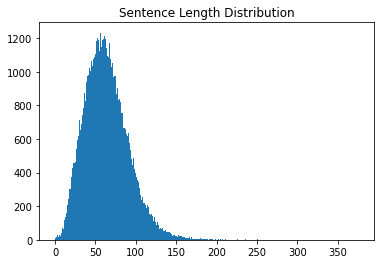

In [17]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

- 길이가 10미만 150 초과의 데이터셋만 살리고 나머지 제거

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


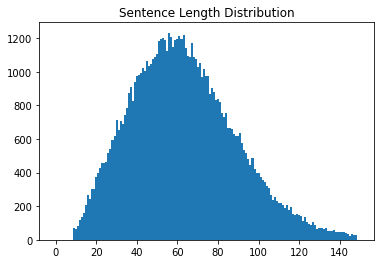

In [18]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

---
# 5. 공백 기반 토큰화
---

In [19]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, tokenizer

####################################################################

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())    

####################################################################

split_tensor, split_tokenizer = tokenize(split_corpus)

In [20]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 5: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는


----
# 6. 형태소 기반 토큰화
---

In [21]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [22]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

In [23]:
for idx, word in enumerate(mecab_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 5: break

0 : .
1 : 다
2 : 이
3 : 는
4 : 을
5 : 의
6 : 에


---
# 7. SentencePiece 토큰화
---


- input : 학습시킬 파일
- model_prefix : 만들어질 모델 이름
- vocab_size : 단어 집합의 크기
- model_type : 사용할 모델 (unigram(default), bpe, char, word)
- max_sentence_length: 문장의 최대 길이
- pad_id, pad_piece: pad token id, 값
- unk_id, unk_piece: unknown token id, 값
- bos_id, bos_piece: begin of sentence token id, 값
- eos_id, eos_piece: end of sequence token id, 값
- user_defined_symbols: 사용자 정의 토큰

In [24]:
cd /content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data

/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data


In [25]:
import sentencepiece as spm
import os
temp_file = '/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/korean-english-park.train.ko.temp'

vocab_size = 12000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw------- 1 root root 455807 Jul  6 01:12 korean_spm.model
-rw------- 1 root root 228724 Jul  6 01:12 korean_spm.vocab


In [26]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1068, 11, 493, 8, 3341, 11, 284, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


- Tokenizer 함수 작성

In [27]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [28]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[    0     0     0     0     0     0     0  1663  5489     5     4 11974
   2552     3]
 [   89  1434    87     4     0   557    11     4    14     0  2827     3
      3     3]]


---
### 7-1 SentencePiece model별 비교
---

- 크기가 작은 txt 파일 생성 후 불러오기

In [29]:
path_to_file = '/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/test.txt'

with open(path_to_file, "r") as f:
    test = f.read().splitlines()
test[:5]

[' 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 ' 모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 ' 그러나 이것은 또한 책상도 필요로 하지 않는다.',
 ' 79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 ' 정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.']

In [30]:
with open('test.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(test))

In [31]:
spm.SentencePieceTrainer.Train('--input=test.txt --model_prefix=test_unigram --vocab_size=500 --model_type=unigram --max_sentence_length=9999')
spm.SentencePieceTrainer.Train('--input=test.txt --model_prefix=test_bpe --vocab_size=500 --model_type=bpe --max_sentence_length=9999')
spm.SentencePieceTrainer.Train('--input=test.txt --model_prefix=test_char --vocab_size=500 --model_type=char --max_sentence_length=9999')
spm.SentencePieceTrainer.Train('--input=test.txt --model_prefix=test_word --vocab_size=500 --model_type=word --max_sentence_length=9999')

In [32]:
import csv 
vocab_list = pd.read_csv('test_unigram.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
458,판,-9.14412
82,무,-6.19041
269,작,-8.03548
159,르,-6.64960
23,로,-5.12169
178,는데,-6.70597
439,포,-9.14222
145,▁광마우스,-6.64960
38,명,-5.55675
240,원,-7.14960


In [33]:
line = '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.'

#################################### Unigram ####################################
sp = spm.SentencePieceProcessor()
sp.Load('test_unigram.model')

# SentencePiece를 활용한 sentence -> encoded pieces
print('unigram')
print(sp.SampleEncodeAsPieces(line,1, 0.0))
# print(sp.encode_as_pieces(line))
print('='*50)
#################################### bpe ####################################
sp2 = spm.SentencePieceProcessor()
sp2.Load('test_bpe.model')

# SentencePiece를 활용한 sentence -> encoded pieces
print('bpe')
print(sp2.SampleEncodeAsPieces(line,1, 0.0))
# print(sp2.encode_as_pieces(line))
print('='*50)
#################################### char ####################################
sp3 = spm.SentencePieceProcessor()
sp3.Load('test_char.model')

# SentencePiece를 활용한 sentence -> encoded pieces
print('char')
# print(sp3.SampleEncodeAsPieces(line,64, 1.0))
print(sp3.encode_as_pieces(line))
print('='*50)
#################################### word ####################################
sp4 = spm.SentencePieceProcessor()
sp4.Load('test_word.model')

# SentencePiece를 활용한 sentence -> encoded pieces
print('word')
# print(sp4.SampleEncodeAsPieces(line,-1, 0.0))
print(sp4.encode_as_pieces(line))

unigram
['▁정', '보', '▁관', '리', '들', '은', '▁동', '남', '▁아시아에', '서', '의', '▁선박', '들에', '▁대', '한', '▁', '많', '은', '▁(', '테러', ')', '▁', '계', '획', '들이', '▁', '실', '패', '로', '▁', '돌', '아', '갔', '음', '을', '▁', '밝', '혔', '으며', ',', '▁세', '계', '▁해', '상', '▁', '교', '역', '량', '의', '▁거', '의', '▁', '3', '분', '의', '▁1', '을', '▁', '운', '송', '하는', '▁', '좁', '은', '▁해', '로', '인', '▁말', '라', '카', '▁해', '협', '이', '▁', '테러', '▁공격', '을', '▁', '당', '하', '기', '▁', '쉽', '다고', '▁경', '고', '하', '고', '▁있다', '.']
bpe
['▁', '정', '보', '▁', '관', '리', '들은', '▁동', '남', '▁아', '시아', '에서', '의', '▁선', '박', '들', '에', '▁대한', '▁', '많', '은', '▁', '(', '테러', ')', '▁', '계', '획', '들이', '▁실', '패', '로', '▁', '돌', '아', '갔', '음', '을', '▁', '밝', '혔', '으며', ',', '▁세', '계', '▁해', '상', '▁', '교', '역', '량', '의', '▁거', '의', '▁', '3', '분', '의', '▁1', '을', '▁', '운', '송', '하는', '▁', '좁', '은', '▁해', '로', '인', '▁말', '라', '카', '▁해', '협', '이', '▁', '테러', '▁공격', '을', '▁', '당', '하기', '▁', '쉽', '다고', '▁경', '고', '하고', '▁있다', '.']
char
['▁', '정', '보', '

- **Unigram**은 각의 서브워드 들에 대해서 손실을 계산한다. 여기서 서브 단어 손실이라는 것은 해당 서브워드가 단어 집합에서 제거 되었을 경우,  
코퍼스의 likelihood가 감소하는 정도를 말한다. 이렇게 측정된 서브워드들을 손실의 정도로 정렬하여,  
최악의 영향을 주는 10%~20%의 토큰을 제거한다.  
이것을 원하는 단어 집합의 크기에 도달할 때 까지 반복한다. 

- **BPE**는 글자(character) 단위에서 점차적으로 단어 집합(vocabulary)을 만들어 내는 Bottom up 방식의 접근을 사용  
훈련 데이터에 있는 단어들을 모든 글자 또는 유니코드 단위로 단어 집합을 만들고, 
가장많이 등장하는 유니그램을 하나의 유니그램으로 통합하는 방식

- **char**는 글자(character)단위로 모든 것을 쪼개는 방식 
- **word**는 단어 단위로 쪼개는 방식 (예를 들면, 공백 기반 split)

- <BPE와 Unigram 요약>
  - BPE: 사전에 정의한 vocabulary size에 도달하기 전까지 매 iteration마다 단지 등장 빈도수만을 확인하여 가장 많이 등장한 pair를 subword set에 추가한다.
  - Unigram: 등장 빈도수는 전혀 사용하지 않고오직 확률모델을 사용한다. 대신 확률 모델을 사용하여 language Model을 훈련시킨다.  
  가장 적게 전반적인 likelihood를 개선한 token들을 삭제하고 final token limit을 만날 때까지 계속한다.  


https://algopoolja.tistory.com/64

---
# 8. 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기
---

---
### 8-1 데이터셋 다운로드
---

In [34]:
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

In [35]:
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

---
### 8-2 데이터셋 불러오기
---

In [36]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어오기
train = pd.read_table('/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/ratings_train.txt')
test = pd.read_table('/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/ratings_test.txt')

print('train 데이터 사이즈:', len(train))
print('test 데이터 사이즈:', len(test))

train.head()

train 데이터 사이즈: 150000
test 데이터 사이즈: 50000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


- Null값 확인

In [37]:
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [38]:
test.isnull().sum()

id          0
document    3
label       0
dtype: int64

- Null값 제거

In [39]:
train = train.dropna()
test = test.dropna()

- 중복값 확인

In [40]:
train[train['document'].duplicated()]

,id,document,label
1058,5890638,4,0
1097,2062443,쵝오,1
1248,3502685,최고,1
1483,775332,최고,1
1707,8009134,재밌다,1
...,...,...,...
149919,6502490,짱,1
149949,3924716,OO 영화,0
149960,6368431,지루하다,0
149966,6735753,1,0


- 중복값 제거

In [41]:
train.drop_duplicates(subset=['document'], inplace=True)
test.drop_duplicates(subset=['document'], inplace=True)

- 제거 확인

In [42]:
print(train.shape)
print(test.shape)

(146182, 3)
(49157, 3)


- 인덱스 초기화

In [43]:
train.reset_index(drop = True,inplace = True)
test.reset_index(drop = True,inplace = True)

---
### 8-3 전처리 및 정제하기
---

- 불필요 단어 제거

In [44]:
def extract_word(text):
  hangul = re.compile('^\d*\d$|[^가-힣a-zA-Z0-9]')
  result = hangul.sub(' ',text)
  result = result.replace('OOOO','')
  result = result.replace('OOO','')
  result = result.replace('OO','')
  # \result = re.sub(r'[","]+', ",",result)
  result = re.sub(r'[" "]+', " ",result)
  return result

In [45]:
print("Before Extraction : ",train['document'][9745])
print("After Extraction : ", extract_word(train['document'][9745]))
print('='*50)
print("Before Extraction : ",train['document'][8045])
print("After Extraction : ", extract_word(train['document'][8045]))
print('='*50)
print("Before Extraction : ",train['document'][2830])
print("After Extraction : ", extract_word(train['document'][2830]))
print('='*50)
print("Before Extraction : ",train['document'][584])
print("After Extraction : ", extract_word(train['document'][584]))
print('='*50)
print("Before Extraction : ",train['document'][135920])
print("After Extraction : ", extract_word(train['document'][135920]))
print('='*50)
print("Before Extraction : ",train['document'][269])
print("After Extraction : ", extract_word(train['document'][269]))
print('='*50)
print("Before Extraction : ",train['document'][3])
print("After Extraction : ", extract_word(train['document'][3]))
print('='*50)
print("Before Extraction : ",train['document'][2919])
print("After Extraction : ", extract_word(train['document'][2919]))
print('='*50)

Before Extraction :  액션이 멋지던 영화 잼깄했눈뎅
After Extraction :  액션이 멋지던 영화 잼깄했눈뎅
Before Extraction :  미친 이게 22년전 상상력이라니... 시나리오 자체도 매트릭스처럼 철학적이다. 과연 엔딩도 꿈이었을까?
After Extraction :  미친 이게 22년전 상상력이라니 시나리오 자체도 매트릭스처럼 철학적이다 과연 엔딩도 꿈이었을까 
Before Extraction :  ㅋㅋㅋ
After Extraction :   
Before Extraction :  1
After Extraction :   
Before Extraction :  밑에 야이 OOOO 너는 영화보지마라, 현실과 영화도 구분 못하는 새끼가 무슨 영화를
After Extraction :  밑에 야이 너는 영화보지마라 현실과 영화도 구분 못하는 새끼가 무슨 영화를
Before Extraction :  OOO영화 뭘전달하려는지모르겠네 오글거리고
After Extraction :  영화 뭘전달하려는지모르겠네 오글거리고
Before Extraction :  교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
After Extraction :  교도소 이야기구먼 솔직히 재미는 없다 평점 조정
Before Extraction :  세계카사노바가,,,,난대...영화배우,,,ㅋㅋㅋ
After Extraction :  세계카사노바가 난대 영화배우 


In [46]:
train['document'] = train['document'].apply(lambda x:extract_word(x))
test['document'] = test['document'].apply(lambda x:extract_word(x))

- 데이터 합치기

In [47]:
data = list(train['document']) + list(test['document'])
print(len(data))
data[:10]

195339


['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화 별반개도 아까움 ',
 '원작의 긴장감을 제대로 살려내지못했다 ',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단 낫겟다 납치 감금만반복반복 이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나 ']

- 정제하기

문장의 최단 길이: 0
문장의 최장 길이: 141
문장의 평균 길이: 33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


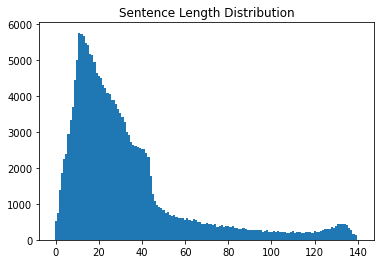

In [48]:
# 문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이분포를 막대그래프로 표현해주는 소스
min_len = 999
max_len = 0
sum_len = 0

for sen in data: 
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(data))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in data:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

전처리하는 과정에서 ㅋㅋㅋ와 같은 단어를 지우다 보니 공백으로 설정된 단어들이 포함되어 있는 것 같다.

In [49]:
check_sentence_with_length(data, 0)
print('='*50)
check_sentence_with_length(data, 1)






아
잼
 
 
 
굿
 
기
 
짱
 
휴
 
 
 
 
음
 
 
 
 
즐
 
 
 
굳
네
 
 
 
 
k
 
 
쒯
 
 
 
 
 
 
토
O
똥
 
 
 
 
 
 
 
 
 
 
z
 
 
헐
 
 
 
 
삼
꽝
 
 
 
 
 
 
 
 
 
 
풉
 
 
 
 
왜
 
 
 
 
쉣
봐
 
 
 
 
뿌
 
 
 
 
 
 
 
 
 
 


In [50]:
# 길이 별로 확인이 필요해보이는 문장 확인하기
for idx, _sum in enumerate(sentence_length):
    # 문장 내 단어의 개수가 5000을 초과하는 인덱스를 추출
    if _sum > 5000:
        print("Outlier Index:", idx+1)

Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18


In [51]:
check_sentence_with_length(data, 13)

진정 위대한 영화 최고임
클라라볼라고화신본거아닌데
오랜만에 재밋는영화봤네요
게이물인줄 모르고 봤네 
감동감동 정말 최고네요 
단순한 싸이코물을 벗어난
그저 한마디뿐 알리시아 
또 보고 또 울 었 다 
딱히 재미는 없네요 킁 
영상이 너무나도 멋지다 
돈과 시간이 아까운 영화
굿 10자 이상 가나다라
노땅들의 한심한 추억미화
내코끼리내놔가 더재밌음 
청춘에는 마침표가 없다 
말그대로 뚝방에서 볼영화
효과음이 기가막혔던 영화
욕망이라는 이름의 전차 
난이게 제일 재밌었는데 
난 좋았는데요 괜찮았어요
김민종 최고 더 잘되시요
무슨 생각으로 만든걸까 
꽃 한송이 놓고 갑니다 
ufo를 믿으려는 자들 
주성치 영화 최고의 졸작
쇼핑백 잊혀지지 않는다 
유치하지만 가볍게 볼만함
tv 전기세가 아까웠다 
연 기 굿 화이팅해요누나
아 진짜 너무 어이없다 
기분 완전 상콤해지는데 
훈훈한만남 가슴따듯 해짐
숨은 명작이다 천재감독 
이거야말로 구제불능이군 
완전 짱 박대동길홍도쾌 
정준호 떄문에 일점이다 
기분종게 웃겨주는 영화 
제일 실망스런 일본 영화
이정도면 10점 받아야지
존나 재미없어요 보지마요
나름 그냥 그저그런 영화
내 생애 최악의 한국영화
강철중 시리즈 완전 잼남
감독 자질 문제라고 밖엔
영화 최곤데 왜 그러지 
돼지가 이렇게 멋질수가 
아 언제 4가 나오려나 
내용이 너무 유치하네요 
뻔한내용이지만 재밌었지 
룸싸롱 찌라시 같은 영화
몇번째 보는지 모르겠다 
평점높아서 밧더만 뉘미 
재미없고 너무 내용이에바
억지 짜집기 스토리 구성
결국 주인공이 이었다는 
꿀잼 근데 아나킨은 언제
뭔 버러지 같은 영화냐 
누가 이영화를 논하는가 
볼 만하지만 걸작은 아님
산만해서 못봐주겠는 영화
처음 부터 끝까지 좋았다
피해자인척 하지마라 일본
백인 여배우는 사랑한다 
언디스퓨티드 이후로 최고
간만에 웃는다 아하하하 
남자 주인공 장승화인데 
정신이상자들이 공감할려나
정식개봉을 했다는 건가 
괜찬아 볼만해 너희도 봐
후속작 영환가 뭐지 이건
최고중에 하나였던 영화 
저 포스터가

Data Size: 191978
문장의 최단 길이: 0
문장의 최장 길이: 141
문장의 평균 길이: 34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


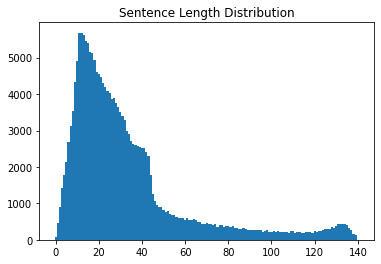

In [52]:
# 데이터에서 중복 제거하기
min_len= 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(data))  # set를 사용해서 중복을 제거
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


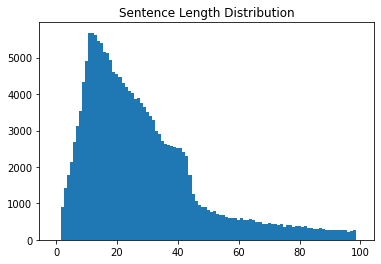

In [53]:
max_len = 100
min_len = 3

# 길이 조건에 맞는 문장만 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려보자 
# 아래 나온 그래프는 최종 데이터 분포
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [54]:
print('제거 후 문장 비율:', '{:.3f}'.format(len(filtered_corpus) / len(cleaned_corpus)))
print('제거 후 문장 개수:',len(filtered_corpus))

제거 후 문장 비율: 0.942
제거 후 문장 개수: 180784


---
# 9. 학습 데이터셋 만들기
---

- 불용어 제거

In [55]:
with open('/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/stopword.txt', 'r',encoding='utf-8') as f:
    list_file = f.readlines()
stopword = []
for i in range(len(list_file)):
  stopword.append(list_file[i].split())
print(stopword[:10])

[['아'], ['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라']]


In [56]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    
    # 불용어 제거 (Text)
    remove_stopwords = [x for x in sentence if x not in stopword]
    
    return remove_stopwords

In [57]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

- 모델 학습을 위한 데이터셋 구성
- train과 test 데이터 셋을 합친 후 중복값 제거

In [58]:
total_data = pd.concat([train,test]) 
total_data.drop_duplicates(subset='document',keep='first',inplace=True)
len(total_data)

191978

- 위 그래프처럼 len을 기준으로 데이터를 자르기 위해 len 컬럼 생성

In [59]:
total_data['len'] = total_data['document'].apply(lambda x: len(x))
total_data

,id,document,label,len
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,17
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,28
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,26
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61
...,...,...,...,...
49152,4608761,오랜만에 평점 로긴했네 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,39
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0,40
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0,31
49155,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0,42


- 위 그래프 처럼 len 기준 3보다 크거나 같고 100보다 작은 데이터만 남기기 

In [60]:
total_data = total_data[(total_data['len'] >= 3) & (total_data['len'] < 100)]
len(total_data)

180784

---
### 9-1 Unigram
---

In [61]:
temp_file = '/content/drive/MyDrive/aiffel/Going_Deeper/GD1_2/data/korean-english-park.train.ko.temp'

vocab_size = 12000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용
        f.write(str(row) + '\n')

# 디폴트 --model_type = 'unigram'
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=naver_review_unigram --vocab_size={}'.format(temp_file, vocab_size)    
)

# --model_type = 'bpe'
spm.SentencePieceTrainer.Train(
    '--input={} --model_type=bpe --model_prefix=naver_review_bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

- unigram과 bpe 모델 생성

In [62]:
s_uni = spm.SentencePieceProcessor() 
s_uni.Load('naver_review_unigram.model') # unigram 타입 model

True

In [63]:
s_bpe = spm.SentencePieceProcessor() 
s_bpe.Load('naver_review_bpe.model') # bpe 타입 model

True

- 생성된 모델을 바탕으로 토큰화

In [64]:
def sp_tokenize_uni(s_uni, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s_uni.EncodeAsIds(sen))

    with open("./naver_review_unigram.vocab", 'r') as f: # unigram 타입 vocab
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)

    return tensor, word_index, index_word

#sp_tokenize(s, corpus) 사용예제로 확인
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor_uni, word_index_uni, index_word_uni = sp_tokenize_uni(s_uni, my_corpus)
print(tensor_uni)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   396  3259
     10  1132  3222     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

In [65]:
tensor_uni, word_index_uni, index_word_uni = sp_tokenize_uni(s_uni, filtered_corpus)

In [66]:
tensor_uni.shape

(180784, 100)

- 데이터 분리

In [67]:
# 데이터 분할
x_train_uni = tensor_uni[ : int(len(tensor_uni) * 0.8)]
x_test_uni = tensor_uni[int(len(tensor_uni) * 0.8) : ]

y_train_uni = np.array(list(total_data['label'][ : int(len(tensor_uni) * 0.8)]))
y_test_uni = np.array(list(total_data['label'][int(len(tensor_uni) * 0.8) : ]))


print(x_train_uni.shape)
print(y_train_uni.shape)

(144627, 100)
(144627,)


---
### 9-2 BPE
---

In [68]:
def sp_tokenize_bpe(s_bpe, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s_bpe.EncodeAsIds(sen))

    with open("./naver_review_bpe.vocab", 'r') as f: # bpe 타입 vocab
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)

    return tensor, word_index, index_word

#sp_tokenize(s, corpus) 사용예제로 확인해
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor_bpe, word_index_bpe, index_word_bpe = sp_tokenize_bpe(s_bpe, my_corpus)
print(tensor_bpe)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   662  2944
  10438   536   808     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

In [69]:
tensor_bpe, word_index_bpe, index_word_bpe = sp_tokenize_bpe(s_bpe, filtered_corpus)

In [70]:
tensor_bpe.shape

(180784, 100)

- 데이터 분리

In [71]:
# 데이터 분할
x_train_bpe = tensor_bpe[ : int(len(tensor_bpe) * 0.8)]
x_test_bpe = tensor_bpe[int(len(tensor_bpe) * 0.8) : ]

y_train_bpe = np.array(list(total_data['label'][ : int(len(tensor_bpe) * 0.8)]))
y_test_bpe = np.array(list(total_data['label'][int(len(tensor_bpe) * 0.8) : ]))


print(x_train_bpe.shape)
print(y_train_bpe.shape)

(144627, 100)
(144627,)


---
### 9-3 공백 기반
---

In [72]:
split_data = total_data.copy()
split_data['document'] = total_data['document'].apply(lambda x: x.split())

In [73]:
clean_text = []
# 전체 Text 데이터에 대한 전처리
for s in split_data['document']:
    clean_text.append(preprocess_sentence(s))

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=20000, 
        filters=' ',
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)       
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor_split, tokenizer_split = tokenize(clean_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
word_to_index_split = {word:index for index, word in tokenizer_split.index_word.items()}

In [76]:
word_to_index_split = {k:(v+3) for k,v in word_to_index_split.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index_split["<PAD>"] = 0
word_to_index_split["<BOS>"] = 1
word_to_index_split["<UNK>"] = 2  # unknown
word_to_index_split["<UNUSED>"] = 3

index_to_word_split = {index:word for word, index in word_to_index_split.items()}

print(index_to_word_split[1])     # '<BOS>' 가 출력
print(index_to_word_split[4])     # '영화'가 출력

<BOS>
영화


In [77]:
split_data['document'] = get_encoded_sentences(split_data['document'],word_to_index_split)

- 데이터 분할

In [78]:
x_train_split = np.array(split_data['document'][ : int(len(split_data ) * 0.8)])
x_test_split = np.array(split_data['document'][int(len(split_data ) * 0.8) : ])

y_train_split = np.array(list(split_data['label'][ : int(len(tensor_split) * 0.8)]))
y_test_split = np.array(list(split_data['label'][int(len(tensor_split) * 0.8) : ]))


print(x_train_split.shape)
print(y_train_split.shape)

(144627,)
(144627,)


In [79]:
total_data_text = list(split_data['document'])
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  7.878429507036021
문장길이 최대 :  35
문장길이 표준편차 :  4.62262018513481
pad_sequences maxlen :  17
전체 문장의 0.9463005575714665%가 maxlen 설정값 이내에 포함됩니다. 


In [80]:
x_train_split= tf.keras.preprocessing.sequence.pad_sequences(x_train_split,
                                                        value=word_to_index_split["<PAD>"],
                                                        padding='pre',maxlen=17)
# --------------------------------------------------------------------------------------------------
x_test_split= tf.keras.preprocessing.sequence.pad_sequences(x_test_split,
                                                        value=word_to_index_split["<PAD>"],
                                                        padding='pre',maxlen=17)

In [133]:
print(x_train_split.shape)
print(y_train_split.shape)

(144627, 17)
(144627,)


---
### 9-4 형태소 기반
---

In [177]:
mecab_corpus = []

for kor in total_data['document']:
    mecab_corpus.append(mecab_split(kor))

In [178]:
len(mecab_corpus)

180784

- 토큰화

In [180]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [181]:
word_to_index_mor = {word:index for index, word in mecab_tokenizer.index_word.items()}

In [182]:
word_to_index_mor = {k:(v+3) for k,v in word_to_index_mor.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index_mor["<PAD>"] = 0
word_to_index_mor["<BOS>"] = 1
word_to_index_mor["<UNK>"] = 2  # unknown
word_to_index_mor["<UNUSED>"] = 3

index_to_word_mor = {index:word for word, index in word_to_index_mor.items()}

print(index_to_word_mor[1])     # '<BOS>' 가 출력
print(index_to_word_mor[4])     # '이' 이 출력

<BOS>
이


In [183]:
mor_data = total_data.copy()
mor_data['document'] = get_encoded_sentences(mor_data['document'],word_to_index_mor)

In [184]:
total_data_text = list(mor_data['document'])
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  30.187522125851846
문장길이 최대 :  100
문장길이 표준편차 :  19.21515225381606
pad_sequences maxlen :  68
전체 문장의 0.9387611735551818%가 maxlen 설정값 이내에 포함됩니다. 


In [186]:
x_train_mor = mor_data['document'][ : int(len(mor_data ) * 0.8)]
x_test_mor = mor_data['document'][int(len(mor_data ) * 0.8) : ]

y_train_mor = np.array(list(mor_data['label'][ : int(len(mecab_tensor) * 0.8)]))
y_test_mor = np.array(list(mor_data['label'][int(len(mecab_tensor) * 0.8) : ]))


print(x_train_mor.shape)
print(y_train_mor.shape)

(144627,)
(144627,)


In [187]:
x_train_mor= tf.keras.preprocessing.sequence.pad_sequences(x_train_mor,
                                                        value=word_to_index_mor["<PAD>"],
                                                        padding='pre',maxlen=68)
# --------------------------------------------------------------------------------------------------
x_test_mor= tf.keras.preprocessing.sequence.pad_sequences(x_test_mor,
                                                        value=word_to_index_mor["<PAD>"],
                                                        padding='pre',maxlen=68)

In [188]:
print(x_train_mor.shape)
print(y_train_mor.shape)

(144627, 68)
(144627,)


---
# 10. 모델 구성 및 학습하기
---

---
### 10-1 Unigram
---

In [143]:
vocab_size = 12000    
word_vector_dim = 16

model_uni = keras.Sequential()
model_uni.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_uni.add(keras.layers.LSTM(12))   
model_uni.add(keras.layers.Dense(8, activation='relu'))
model_uni.add(keras.layers.Dense(1, activation='sigmoid'))  

model_uni.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          192000    
                                                                 
 lstm_1 (LSTM)               (None, 12)                1392      
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193,505
Trainable params: 193,505
Non-trainable params: 0
_________________________________________________________________


In [144]:
model_uni.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_rnn = model_uni.fit(x_train_uni, y_train_uni,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_uni, y_test_uni),
                    verbose=1)

Epoch 1/20
565/565 [==============================] - 6s 8ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 2/20
565/565 [==============================] - 4s 8ms/step - loss: 0.6909 - accuracy: 0.5305 - val_loss: 0.6961 - val_accuracy: 0.4973
Epoch 3/20
565/565 [==============================] - 4s 8ms/step - loss: 0.6715 - accuracy: 0.5835 - val_loss: 0.7111 - val_accuracy: 0.5014
Epoch 4/20
565/565 [==============================] - 4s 8ms/step - loss: 0.6444 - accuracy: 0.6246 - val_loss: 0.7394 - val_accuracy: 0.4939
Epoch 5/20
565/565 [==============================] - 4s 8ms/step - loss: 0.6175 - accuracy: 0.6555 - val_loss: 0.7602 - val_accuracy: 0.4952
Epoch 6/20
565/565 [==============================] - 4s 8ms/step - loss: 0.5923 - accuracy: 0.6797 - val_loss: 0.7853 - val_accuracy: 0.4942
Epoch 7/20
565/565 [==============================] - 4s 8ms/step - loss: 0.5675 - accuracy: 0.7007 - val_loss: 0.8587 - val_accuracy: 0.4950
Epoch 

In [168]:
history_uni = history_rnn.history

# train과 val의 Loss
acc_uni = history_uni['accuracy']
val_acc_uni = history_uni['val_accuracy']
loss_uni = history_uni['loss']
val_loss_uni = history_uni['val_loss']

epochs_uni = range(1, len(acc_uni) + 1)

def model_gram(acc,val_acc,loss,val_loss,epochs):
  # "bo"는 "파란색 점"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b는 "파란 실선"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training & validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

  # train과 val의 accuracy
  plt.clf()  

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

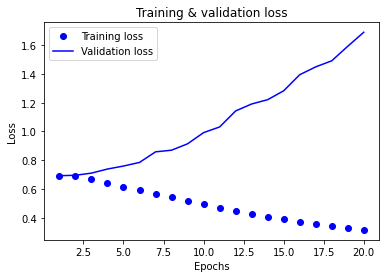

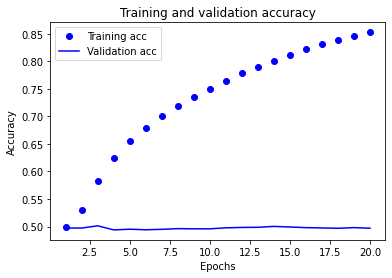

In [169]:
model_gram(acc_uni,val_acc_uni,loss_uni,val_loss_uni,epochs_uni)

학습용 데이터에 대한 학습은 잘 이루어지고 있으나,  
평가용 데이터에 대한 평가는 부진한 모습을 보이고 있다.

---
### 10-2 BPE
---

In [146]:
vocab_size = 12000    
word_vector_dim = 16

model_bpe = keras.Sequential()
model_bpe.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_bpe.add(keras.layers.LSTM(12))   
model_bpe.add(keras.layers.Dense(8, activation='relu'))
model_bpe.add(keras.layers.Dense(1, activation='sigmoid'))  

model_bpe.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          192000    
                                                                 
 lstm_2 (LSTM)               (None, 12)                1392      
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193,505
Trainable params: 193,505
Non-trainable params: 0
_________________________________________________________________


In [149]:
model_bpe.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_bpe = model_bpe.fit(x_train_bpe, y_train_bpe,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_bpe, y_test_bpe),
                    verbose=1)

Epoch 1/20
565/565 [==============================] - 6s 8ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5028
Epoch 2/20
565/565 [==============================] - 5s 9ms/step - loss: 0.6905 - accuracy: 0.5305 - val_loss: 0.6957 - val_accuracy: 0.4951
Epoch 3/20
565/565 [==============================] - 4s 8ms/step - loss: 0.6704 - accuracy: 0.5857 - val_loss: 0.7106 - val_accuracy: 0.4999
Epoch 4/20
565/565 [==============================] - 5s 8ms/step - loss: 0.6369 - accuracy: 0.6333 - val_loss: 0.7438 - val_accuracy: 0.4982
Epoch 5/20
565/565 [==============================] - 5s 9ms/step - loss: 0.6024 - accuracy: 0.6679 - val_loss: 0.7908 - val_accuracy: 0.4985
Epoch 6/20
565/565 [==============================] - 5s 9ms/step - loss: 0.5718 - accuracy: 0.6940 - val_loss: 0.8180 - val_accuracy: 0.4968
Epoch 7/20
565/565 [==============================] - 5s 9ms/step - loss: 0.5417 - accuracy: 0.7164 - val_loss: 0.8869 - val_accuracy: 0.4978
Epoch 

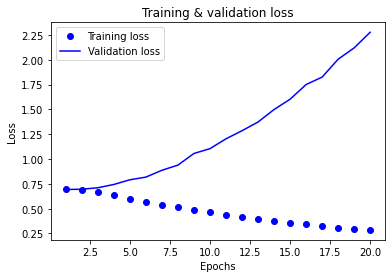

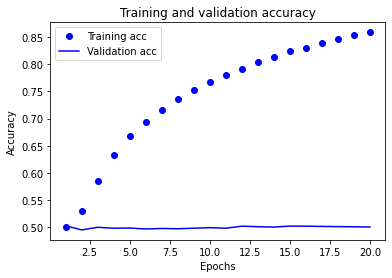

In [170]:
history_bpe_ = history_bpe.history

# train과 val의 Loss
acc_bpe = history_bpe_['accuracy']
val_acc_bpe = history_bpe_['val_accuracy']
loss_bpe = history_bpe_['loss']
val_loss_bpe = history_bpe_['val_loss']

epochs_bpe = range(1, len(acc_bpe) + 1)

model_gram(acc_bpe, val_acc_bpe, loss_bpe, val_loss_bpe, epochs_bpe)

위 unigram과 동일한 모습을 보이고 있다.

---
### 10-3 공백
---

In [164]:
vocab_size = 12000    
word_vector_dim = 16

model_split = keras.Sequential()
model_split.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_split.add(keras.layers.LSTM(12))   
model_split.add(keras.layers.Dense(8, activation='relu'))
model_split.add(keras.layers.Dense(1, activation='sigmoid'))  

model_split.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          192000    
                                                                 
 lstm_3 (LSTM)               (None, 12)                1392      
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193,505
Trainable params: 193,505
Non-trainable params: 0
_________________________________________________________________


In [166]:
model_split.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_split = model_split.fit(x_train_split, y_train_split,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_split, y_test_split),
                    verbose=1)

Epoch 1/20
565/565 [==============================] - 5s 6ms/step - loss: 0.4888 - accuracy: 0.7540 - val_loss: 0.4080 - val_accuracy: 0.7991
Epoch 2/20
565/565 [==============================] - 3s 6ms/step - loss: 0.3735 - accuracy: 0.8174 - val_loss: 0.4032 - val_accuracy: 0.8000
Epoch 3/20
565/565 [==============================] - 3s 5ms/step - loss: 0.3571 - accuracy: 0.8259 - val_loss: 0.4075 - val_accuracy: 0.7977
Epoch 4/20
565/565 [==============================] - 4s 6ms/step - loss: 0.3448 - accuracy: 0.8317 - val_loss: 0.4130 - val_accuracy: 0.7979
Epoch 5/20
565/565 [==============================] - 4s 6ms/step - loss: 0.3345 - accuracy: 0.8369 - val_loss: 0.4172 - val_accuracy: 0.7956
Epoch 6/20
565/565 [==============================] - 3s 6ms/step - loss: 0.3243 - accuracy: 0.8426 - val_loss: 0.4381 - val_accuracy: 0.7941
Epoch 7/20
565/565 [==============================] - 3s 6ms/step - loss: 0.3142 - accuracy: 0.8467 - val_loss: 0.4469 - val_accuracy: 0.7963
Epoch 

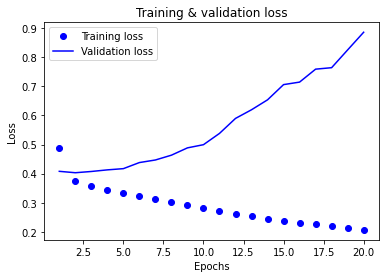

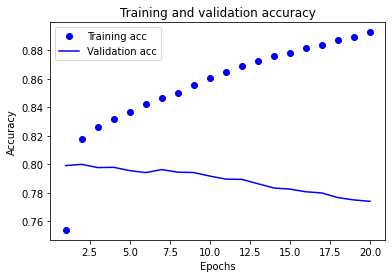

In [171]:
history_split_ = history_split.history

# train과 val의 Loss
acc_split = history_split_['accuracy']
val_acc_split = history_split_['val_accuracy']
loss_split = history_split_['loss']
val_loss_split = history_split_['val_loss']

epochs_split = range(1, len(acc_split) + 1)

model_gram(acc_split, val_acc_split, loss_split, val_loss_split, epochs_split)

시작 부분은 매우 낮다가 바로 급격하게 증가하는 모습을 보인다.  
다만 이전의 값들과는 다르게 평가 데이터가 좋아지는 모습을 보인다.

---
### 10-4 형태소
---

In [172]:
vocab_size = 12000    
word_vector_dim = 16

model_mor = keras.Sequential()
model_mor.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_mor.add(keras.layers.LSTM(12))   
model_mor.add(keras.layers.Dense(8, activation='relu'))
model_mor.add(keras.layers.Dense(1, activation='sigmoid'))  

model_mor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          192000    
                                                                 
 lstm_4 (LSTM)               (None, 12)                1392      
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193,505
Trainable params: 193,505
Non-trainable params: 0
_________________________________________________________________


In [189]:
model_mor.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_mor = model_mor.fit(x_train_mor, y_train_mor,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_mor, y_test_mor),
                    verbose=1)

Epoch 1/20
565/565 [==============================] - 6s 7ms/step - loss: 0.5102 - accuracy: 0.7501 - val_loss: 0.4701 - val_accuracy: 0.7755
Epoch 2/20
565/565 [==============================] - 4s 7ms/step - loss: 0.4475 - accuracy: 0.7897 - val_loss: 0.4436 - val_accuracy: 0.7889
Epoch 3/20
565/565 [==============================] - 4s 6ms/step - loss: 0.4260 - accuracy: 0.7996 - val_loss: 0.4288 - val_accuracy: 0.7976
Epoch 4/20
565/565 [==============================] - 4s 6ms/step - loss: 0.4101 - accuracy: 0.8088 - val_loss: 0.4167 - val_accuracy: 0.8070
Epoch 5/20
565/565 [==============================] - 4s 6ms/step - loss: 0.3963 - accuracy: 0.8176 - val_loss: 0.4090 - val_accuracy: 0.8121
Epoch 6/20
565/565 [==============================] - 4s 6ms/step - loss: 0.3849 - accuracy: 0.8244 - val_loss: 0.3987 - val_accuracy: 0.8178
Epoch 7/20
565/565 [==============================] - 4s 6ms/step - loss: 0.3763 - accuracy: 0.8288 - val_loss: 0.3920 - val_accuracy: 0.8219
Epoch 

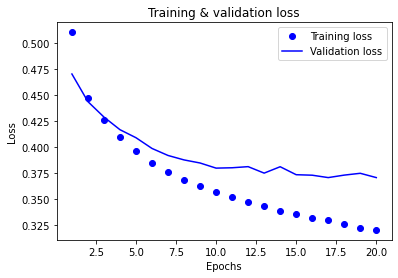

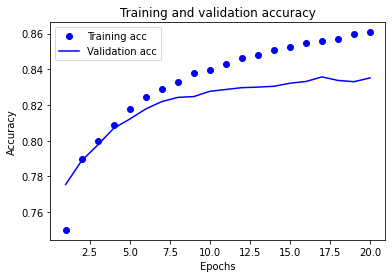

In [190]:
history_mor_ = history_mor.history

# train과 val의 Loss
acc_mor = history_mor_['accuracy']
val_acc_mor = history_mor_['val_accuracy']
loss_mor = history_mor_['loss']
val_loss_mor = history_mor_['val_loss']

epochs_mor = range(1, len(acc_mor) + 1)

model_gram(acc_mor, val_acc_mor, loss_mor, val_loss_mor, epochs_mor)

이전과 다르게 학습 데이터와 평가 데이터가 한 곳으로 수렴하는 모습을 보여준다.  
이전 까지 나온 값들 중에 가장 좋은 학습과 평가의 수치가 나왔다.

----
# 11. 결과값 모아보기
---

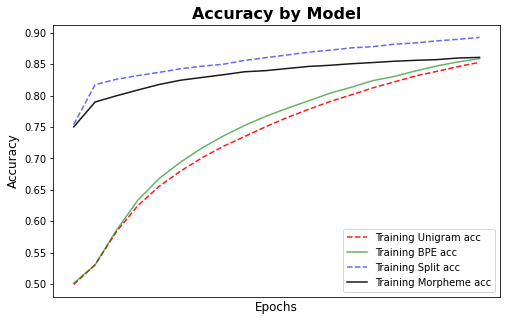

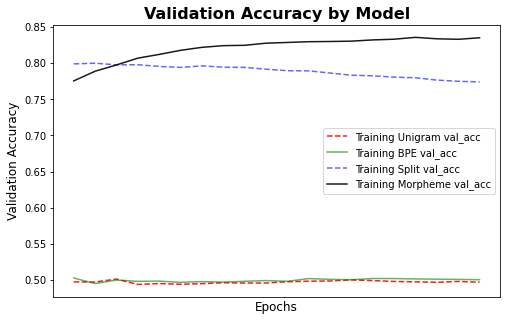

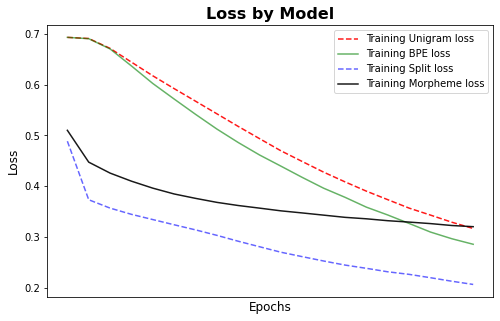

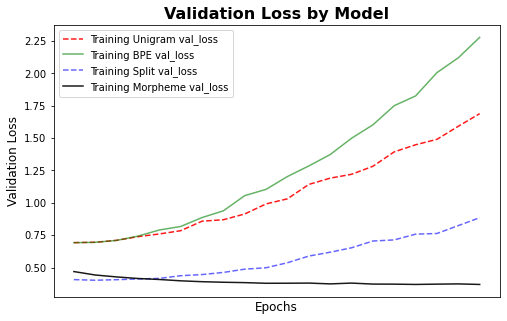

In [233]:
title_font = {'fontsize': 16, 'fontweight': 'bold'}

################################## Accuracy ####################################

plt.figure(figsize=(8,5))
plt.plot(epochs_uni,acc_uni, 'r--', label='Training Unigram acc', alpha = 0.9)
plt.plot(epochs_uni,acc_bpe, 'g', label='Training BPE acc', alpha = 0.6)
plt.plot(epochs_uni,acc_split, 'b--', label='Training Split acc', alpha = 0.6)
plt.plot(epochs_uni,acc_mor, 'black', label='Training Morpheme acc', alpha = 0.9)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks([ ])
plt.legend(loc='best')
plt.title('Accuracy by Model', fontdict = title_font)
plt.show()

################################# Validation Accuracy ##########################
plt.figure(figsize=(8,5))
plt.plot(epochs_uni,val_acc_uni, 'r--', label='Training Unigram val_acc', alpha = 0.9)
plt.plot(epochs_uni,val_acc_bpe, 'g', label='Training BPE val_acc', alpha = 0.6)
plt.plot(epochs_uni,val_acc_split, 'b--', label='Training Split val_acc', alpha = 0.6)
plt.plot(epochs_uni,val_acc_mor, 'black', label='Training Morpheme val_acc', alpha = 0.9)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.xticks([ ])
plt.legend(loc='best')
plt.title('Validation Accuracy by Model', fontdict = title_font)
plt.show()

#################################### loss ######################################
plt.figure(figsize=(8,5))
plt.plot(epochs_uni,loss_uni, 'r--', label='Training Unigram loss', alpha = 0.9)
plt.plot(epochs_uni,loss_bpe, 'g', label='Training BPE loss', alpha = 0.6)
plt.plot(epochs_uni,loss_split, 'b--', label='Training Split loss', alpha = 0.6)
plt.plot(epochs_uni,loss_mor, 'black', label='Training Morpheme loss', alpha = 0.9)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks([ ])
plt.legend(loc='best')
plt.title('Loss by Model', fontdict = title_font)
plt.show()

################################# Validation Loss ##############################
plt.figure(figsize=(8,5))
plt.plot(epochs_uni,val_loss_uni, 'r--', label='Training Unigram val_loss', alpha = 0.9)
plt.plot(epochs_uni,val_loss_bpe, 'g', label='Training BPE val_loss', alpha = 0.6)
plt.plot(epochs_uni,val_loss_split, 'b--', label='Training Split val_loss', alpha = 0.6)
plt.plot(epochs_uni,val_loss_mor, 'black', label='Training Morpheme val_loss', alpha = 0.9)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.xticks([ ])
plt.legend(loc='best')
plt.title('Validation Loss by Model', fontdict = title_font)
plt.show()


전반적으로 형태소를 기반으로한 데이터셋이 가장 좋은 값을 보이고 있으며  
다음은 split을 기반으로 한 데이터셋이 다음을 이루고 있다.  

SentencePiece의 subword 기반 토큰화를 하는 Unigram과 Bpe는 의외로 별반 차이가 없는 것 처럼 보인다.

---
# 11. 회고
---

- 데이터를 전처리하는 과정에서 ,,, / ... / 등의 노이즈들이 다분했다. <br><br>
- 한국어 임베딩에서 ,과 .은 문장의 중간 끝을 알리는 표현으로 결과값에 긍정적인 영향을 미칠 수 있는 글자들이라고 한다. <br><br>
- 처음에는 정규표현식을 통해서 여러개의 ,과. 중 한개씩 있는 문자들만 제외하고  
나머지(여러개)를 공백으로 변경하는 방식을 고민했으나, 정규표현식으로는 해당 과정을 진행할 수가 없었다.  
고민을 거친 결과, ,와 .를 모두 삭제하는 방식으로 진행하였다. <br><br>
- 7-1에서 sentencePiece의 모델 방법에 따라서 비교를 진행해 보았다.  
해당 모델들이 어떤 방식으로 이루어지는지 이해하고 싶었지만,  
단어장을 형성하는 과정에 대해서 간략하게 빈도 및 likelihood를 활용한다는 설명만 할 뿐 과정을 볼 수가 없었다. <br><br>
- 동일한 모델을 두고 다른 방식으로 토큰화를 진행함에 있어서 차이를 비교해보는 과제였다.<br><br>
- 한국어의 특성상 형태소를 기반으로 하는 것이 가장 좋다는 결론과 이전의 결과를 다시 한번 확인할 수 있는 기회였다.<br><br>
- 처음에는 subword 기반의 토큰화를 진행하는 2가지 방법이 단어의 빈도 및 likelihood를 기준으로 하는 만큼  
공백을 기준으로 하는 것 보다 더 좋은 성능을 보일 것이라 생각했지만 결과는 정반대였다.  <br><br>
- 언어별 특성에 따라 더 적합한 방식의 토큰화가 있다는 것을 다시 한번 느낄 수 있었다.